<a href="https://colab.research.google.com/github/GirijaKondapally/Girija_INFO5731_-Fall2023/blob/main/Kondapally_Exercise_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 4/18/2023)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training.

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.

Algorithms:

(1) MultinominalNB

(2) SVM

(3) KNN

(4) Decision tree

(5) Random Forest

(6) XGBoost

(7) Word2Vec

(8) BERT

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison

(4) F-1 score

In [1]:
# Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

with open("/content/stsa-train.txt") as text:
    mylist_train = [line.rstrip('\n') for line in text]

l = [] #labels
t = [] #text

for i, line in enumerate(mylist_train):
    label = mylist_train[i][0]
    tex = mylist_train[i][1:]
    l.append(label)
    t.append(tex)

dataset = pd.DataFrame(list(zip(l, t)),columns =['Reviews', 'Text'])
dataset.head()

,Reviews,Text
0,1,"a stirring , funny and finally transporting r..."
1,0,apparently reassembled from the cutting-room ...
2,0,they presume their audience wo n't sit still ...
3,1,this is a visually stunning rumination on lov...
4,1,jonathan parker 's bartleby should have been ...


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
#Data prepocessing for training data
import nltk
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(sent):
    sent=str(sent)
    sent = sent.lower()
    sent=sent.replace('{html}',"")
    cleaner = re.compile('<.*?>')
    cleantext = re.sub(cleaner, '', sent)
    r_url=re.sub(r'http\S+', '',cleantext)
    r_num = re.sub('[0-9]+', '', r_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(r_num)
    filteredWords = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filteredWords]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filteredWords)


dataset['cleanText']=dataset['Text'].map(lambda s:preprocess(s))
dataset.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,Reviews,Text,cleanText
0,1,"a stirring , funny and finally transporting r...",stirring funny finally transporting imagining ...
1,0,apparently reassembled from the cutting-room ...,apparently reassembled cutting room floor give...
2,0,they presume their audience wo n't sit still ...,presume audience sit still sociology lesson ho...
3,1,this is a visually stunning rumination on lov...,visually stunning rumination love memory histo...
4,1,jonathan parker 's bartleby should have been ...,jonathan parker bartleby end modern office ano...


In [4]:
#Testing data
with open("stsa-test.txt") as txtf:
    mylist_test = [line.rstrip('\n') for line in txtf]

labels_test = []
text_test = []

for i, line in enumerate(mylist_test):
    label_test = mylist_test[i][0]
    tex_test = mylist_test[i][1:]
    labels_test.append(label_test)
    text_test.append(tex_test)

dataset_test = pd.DataFrame(list(zip(labels_test, text_test)),columns =['Reviews', 'Text'])
dataset_test.head()

,Reviews,Text
0,0,"no movement , no yuks , not much of anything ."
1,0,"a gob of drivel so sickly sweet , even the ea..."
2,0,"gangs of new york is an unapologetic mess , w..."
3,0,we never really feel involved with the story ...
4,1,this is one of polanski 's best films .


In [5]:
#data preprocessing for testing data
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(sent):
    sent=str(sent)
    sent = sent.lower()
    sent=sent.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sent)
    r_url=re.sub(r'http\S+', '',cleantext)
    r_num = re.sub('[0-9]+', '', r_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(r_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


dataset_test['cleanText']=dataset_test['Text'].map(lambda s:preprocess(s))
dataset_test.head()

,Reviews,Text,cleanText
0,0,"no movement , no yuks , not much of anything .",movement yuks much anything
1,0,"a gob of drivel so sickly sweet , even the ea...",gob drivel sickly sweet even eager consumers m...
2,0,"gangs of new york is an unapologetic mess , w...",gangs new york unapologetic mess whose saving ...
3,0,we never really feel involved with the story ...,never really feel involved story ideas remain ...
4,1,this is one of polanski 's best films .,one polanski best films


In [7]:
#TF-IDF vectorization
from sklearn.feature_extraction.text import CountVectorizer
tf_idf_vectorizer = CountVectorizer(lowercase = False, analyzer='word')
train_tfidf = tf_idf_vectorizer.fit_transform(dataset["cleanText"]).toarray()
test_tfidf = tf_idf_vectorizer.transform(dataset_test["cleanText"]).toarray()
x_test = test_tfidf
y_test = dataset_test["Reviews"]

from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_tfidf,dataset["Reviews"],test_size = 0.2, random_state=1)



In [8]:
#Algorithms
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
model = classifier.fit(x_train, y_train)
predictions_validation_set = classifier.predict(x_valid)


from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print ("Accuracy of MultinomialNB on validation set is : ", round(accuracy_score(y_valid, predictions_validation_set)*100),"%")
print ("Percision of MultinomialNB on validation set is : ", round(precision_score(y_valid, predictions_validation_set, pos_label='0')*100),"%")
print ("Recall of MultinomialNB on validation set is : ", round(recall_score(y_valid, predictions_validation_set, pos_label='0')*100),"%")
print ("F1 Score of MultinomialNB on validation set is : ", round(f1_score(y_valid, predictions_validation_set, pos_label='0')*100),"%")

from sklearn.metrics import classification_report
cr_naive_validation = classification_report(y_valid, predictions_validation_set)
print("Classification Report: ", "\n", "\n",cr_naive_validation)

from sklearn.model_selection import cross_val_score
naive_accuracies_validation = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print(f"Naive Bayes Model  10-fold cross validation score on train set is :  {round(naive_accuracies_validation.mean(), 2)}")

predictions_test_set = classifier.predict(x_test)
print ("Accuracy of MultinomialNB model on test set is : ", round(accuracy_score(y_test, predictions_test_set)*100),"%")
print ("Percision of MultinomialNB model on test set is : ", round(precision_score(y_test, predictions_test_set, pos_label='0')*100),"%")
print ("Recall of MultinomialNB model on test set is : ", round(recall_score(y_test, predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of MultinomialNB model on test set is : ", round(f1_score(y_test, predictions_test_set, pos_label='0')*100),"%")

cr_naive_test = classification_report(y_test, predictions_test_set)
print("Classification Report: ", "\n", "\n",cr_naive_test)

naive_accuracies_test = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 10)

print(f"Naive Bayes Model  10-fold cross validation score on test set is :  {round(naive_accuracies_test.mean(), 2)}")


Accuracy of MultinomialNB on validation set is :  77 %
Percision of MultinomialNB on validation set is :  77 %
Recall of MultinomialNB on validation set is :  75 %
F1 Score of MultinomialNB on validation set is :  76 %
Classification Report:  
 
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       675
           1       0.77      0.79      0.78       709

    accuracy                           0.77      1384
   macro avg       0.77      0.77      0.77      1384
weighted avg       0.77      0.77      0.77      1384

Naive Bayes Model  10-fold cross validation score on train set is :  0.78
Accuracy of MultinomialNB model on test set is :  78 %
Percision of MultinomialNB model on test set is :  81 %
Recall of MultinomialNB model on test set is :  74 %
F1 Score of MultinomialNB model on test set is :  77 %
Classification Report:  
 
               precision    recall  f1-score   support

           0       0.81      0.74      0.77       

In [9]:
#SVM
from sklearn import svm

classifier_svm = svm.SVC()
model_svm = classifier_svm.fit(x_train, y_train)
svm_validation_set = classifier_svm.predict(x_valid)

print ("Accuracy of SVM model on validation set is : ", round(accuracy_score(y_valid, svm_validation_set)*100),"%")
print ("Percision of SVM model on validation set is : ", round(precision_score(y_valid, svm_validation_set, pos_label='0')*100),"%")
print ("Recall of SVM model on validation set is : ", round(recall_score(y_valid, svm_validation_set, pos_label='0')*100),"%")
print ("F1 Score of SVM model on validation set is : ", round(f1_score(y_valid, svm_validation_set, pos_label='0')*100),"%")

from sklearn.metrics import classification_report
cr_svm_validation = classification_report(y_valid, svm_validation_set)
print("Classification Report: ", "\n", "\n",cr_svm_validation)

from sklearn.model_selection import cross_val_score
svm_accuracies_validation = cross_val_score(estimator = classifier_svm, X = x_train, y = y_train, cv = 10)
print(f"SVM Model 10-fold cross-validation score on the train set is: {round(svm_accuracies_validation.mean() * 100)}%")

svm_test_set = classifier_svm.predict(x_test)
print ("Accuracy of the SVM model on test set is : ", round(accuracy_score(y_test, svm_test_set)*100),"%")
print ("Percision of the SVM model on test set is : ", round(precision_score(y_test, svm_test_set, pos_label='0')*100),"%")
print ("Recall of the SVM model on test set is : ", round(recall_score(y_test, svm_test_set, pos_label='0')*100),"%")
print ("F1 Score of the SVM model on test set is : ", round(f1_score(y_test, svm_test_set, pos_label='0')*100),"%")

cr_svm_test = classification_report(y_test, svm_test_set)
print("Classification Report: ", "\n", "\n",cr_svm_test)

svm_accuracies_test = cross_val_score(estimator = classifier_svm, X = x_test, y = y_test, cv = 10)
print(f"SVM Model 10-fold cross validation score on test set is :  {round(svm_accuracies_test.mean()*100)}%")

Accuracy of SVM model on validation set is :  75 %
Percision of SVM model on validation set is :  74 %
Recall of SVM model on validation set is :  74 %
F1 Score of SVM model on validation set is :  74 %
Classification Report:  
 
               precision    recall  f1-score   support

           0       0.74      0.74      0.74       675
           1       0.75      0.76      0.76       709

    accuracy                           0.75      1384
   macro avg       0.75      0.75      0.75      1384
weighted avg       0.75      0.75      0.75      1384

SVM Model 10-fold cross-validation score on the train set is: 75%
Accuracy of the SVM model on test set is :  77 %
Percision of the SVM model on test set is :  79 %
Recall of the SVM model on test set is :  75 %
F1 Score of the SVM model on test set is :  77 %
Classification Report:  
 
               precision    recall  f1-score   support

           0       0.79      0.75      0.77       912
           1       0.76      0.80      0.78 

In [10]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier(n_neighbors = 15)
model_knn = classifier_knn.fit(x_train, y_train)
knn_validation_set = classifier_knn.predict(x_valid)


print ("Accuracy of the KNN model on validation set is : ", round(accuracy_score(y_valid, knn_validation_set)*100),"%")
print ("Percision of the KNN model on validation set is : ", round(precision_score(y_valid, knn_validation_set, pos_label='0')*100),"%")
print ("Recall of the KNN model on validation set is : ", round(recall_score(y_valid, knn_validation_set, pos_label='0')*100),"%")
print ("F1 Score of the KNN model on validation set is : ", round(f1_score(y_valid, knn_validation_set,pos_label='0')*100),"%")

from sklearn.metrics import classification_report
cr_knn_validation = classification_report(y_valid, knn_validation_set)
print("Classification Report: ", "\n", "\n",cr_knn_validation)

from sklearn.model_selection import cross_val_score
knn_accuracies_validation = cross_val_score(estimator = classifier_knn, X = x_train, y = y_train, cv = 10)
print(f"KNN Model 10-fold cross-validation score on the train set is: {round(knn_accuracies_validation.mean() * 100)}%")

knn_test_set = classifier_knn.predict(x_test)
print ("Accuracy of the knn model on test set is : ", round(accuracy_score(y_test, knn_test_set)*100),"%")
print ("Percision of the knn model on test set is : ", round(precision_score(y_test, knn_test_set, pos_label='0')*100),"%")
print ("Recall of the knn model on test set is : ", round(recall_score(y_test, knn_test_set, pos_label='0')*100),"%")
print ("F1 Score of the knn model on test set is : ", round(f1_score(y_test, knn_test_set, pos_label='0')*100),"%")

cr_knn_test = classification_report(y_test, knn_test_set)
print("Classification Report: ", "\n", "\n",cr_knn_test)

knn_accuracies_test = cross_val_score(estimator = classifier_knn, X = x_test, y = y_test, cv = 10)
print(f"knn Model 10-fold cross validation score on test set is :  {round(knn_accuracies_test.mean()*100)}%")

Accuracy of the KNN model on validation set is :  53 %
Percision of the KNN model on validation set is :  51 %
Recall of the KNN model on validation set is :  88 %
F1 Score of the KNN model on validation set is :  65 %
Classification Report:  
 
               precision    recall  f1-score   support

           0       0.51      0.88      0.65       675
           1       0.64      0.20      0.30       709

    accuracy                           0.53      1384
   macro avg       0.57      0.54      0.47      1384
weighted avg       0.57      0.53      0.47      1384

KNN Model 10-fold cross-validation score on the train set is: 53%
Accuracy of the knn model on test set is :  55 %
Percision of the knn model on test set is :  53 %
Recall of the knn model on test set is :  89 %
F1 Score of the knn model on test set is :  66 %
Classification Report:  
 
               precision    recall  f1-score   support

           0       0.53      0.89      0.66       912
           1       0.66     

In [11]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()
model_dt = classifier_dt.fit(x_train, y_train)
dt_validation_set = classifier_dt.predict(x_valid)

print ("Accuracy of Decison Tree model on validation set is : ", round(accuracy_score(y_valid, dt_validation_set)*100),"%")
print ("Percision of Decison Tree model on validation set is : ", round(precision_score(y_valid, dt_validation_set, pos_label='0')*100),"%")
print ("Recall of Decison Tree model on validation set is : ", round(recall_score(y_valid, dt_validation_set, pos_label='0')*100),"%")
print ("F1 Score of Decison Tree model on validation set is : ", round(f1_score(y_valid, dt_validation_set, pos_label='0')*100),"%")

from sklearn.metrics import classification_report
cr_dt_validation = classification_report(y_valid, dt_validation_set)
print("Classification Report: ", "\n", "\n",cr_dt_validation)

from sklearn.model_selection import cross_val_score
dt_accuracies_validation = cross_val_score(estimator = classifier_dt, X = x_train, y = y_train, cv = 10)

print(f"Decison Tree Classifier Model  10-fold cross validation score on train set is :  {round(dt_accuracies_validation.mean() * 100)}%")

dt_test_set = classifier_dt.predict(x_test)
print ("Accuracy of the Decison Tree model on test set is : ", round(accuracy_score(y_test, dt_test_set)*100),"%")
print ("Percision of the Decison Tree model on test set is : ", round(precision_score(y_test, dt_test_set, pos_label='0')*100),"%")
print ("Recall of the Decison Tree model on test set is : ", round(recall_score(y_test, dt_test_set, pos_label='0')*100),"%")
print ("F1 Score of the Decison Tree model on test set is : ", round(f1_score(y_test, dt_test_set, pos_label='0')*100),"%")

cr_dt_test = classification_report(y_test, dt_test_set)
print("Classification Report: ", "\n", "\n",cr_dt_test)

dt_accuracies_test = cross_val_score(estimator = classifier_dt, X = x_test, y = y_test, cv = 10)

print(f"Decison Tree Classifier Model 10-fold cross validation score on test set is :  {round(dt_accuracies_test.mean()*100)}%")

Accuracy of Decison Tree model on validation set is :  65 %
Percision of Decison Tree model on validation set is :  64 %
Recall of Decison Tree model on validation set is :  65 %
F1 Score of Decison Tree model on validation set is :  64 %
Classification Report:  
 
               precision    recall  f1-score   support

           0       0.64      0.65      0.64       675
           1       0.66      0.65      0.65       709

    accuracy                           0.65      1384
   macro avg       0.65      0.65      0.65      1384
weighted avg       0.65      0.65      0.65      1384

Decison Tree Classifier Model  10-fold cross validation score on train set is :  66%
Accuracy of the Decison Tree model on test set is :  66 %
Percision of the Decison Tree model on test set is :  65 %
Recall of the Decison Tree model on test set is :  68 %
F1 Score of the Decison Tree model on test set is :  67 %
Classification Report:  
 
               precision    recall  f1-score   support

       

In [12]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier()
model_rf = classifier_rf.fit(x_train, y_train)
rf_validation_set = classifier_rf.predict(x_valid)

print ("Accuracy of the Random Forest model on validation set is : ", round(accuracy_score(y_valid, rf_validation_set)*100),"%")
print ("Percision of the Random Forest model on validation set is : ", round(precision_score(y_valid, rf_validation_set, pos_label='0')*100),"%")
print ("Recall of the Random Forest model on validation set is : ", round(recall_score(y_valid, rf_validation_set, pos_label='0')*100),"%")
print ("F1 Score of the Random Forest model on validation set is : ", round(f1_score(y_valid, rf_validation_set, pos_label='0')*100),"%")

from sklearn.metrics import classification_report

cr_rf_validation = classification_report(y_valid, rf_validation_set)
print("Classification Report: ", "\n", "\n",cr_rf_validation)

from sklearn.model_selection import cross_val_score
rf_accuracies_validation = cross_val_score(estimator = classifier_rf, X = x_train, y = y_train, cv = 10)

print(f"Decison Random Forest Model  10-fold cross validation score on train set is :  {round(rf_accuracies_validation.mean() * 100)}%")

rf_test_set = classifier_rf.predict(x_test)
print ("Accuracy of the Random Forest Classifier model on test set is : ", round(accuracy_score(y_test, rf_test_set)*100),"%")
print ("Percision of the Random Forest Classifier model on test set is : ", round(precision_score(y_test, rf_test_set, pos_label='0')*100),"%")
print ("Recall of the Random Forest Classifier model on test set is : ", round(recall_score(y_test, rf_test_set, pos_label='0')*100),"%")
print ("F1 Score of the Random Forest Classifier model on test set is : ", round(f1_score(y_test, rf_test_set, pos_label='0')*100),"%")

cr_rf_test = classification_report(y_test, rf_test_set)
print("Classification Report: ", "\n", "\n",cr_rf_test)

rf_accuracies_test = cross_val_score(estimator = classifier_rf, X = x_test, y = y_test, cv = 10)

print(f"Random Forest Classifier Model 10-fold cross validation score on test set is :  {round(rf_accuracies_test.mean()*100)}%")

Accuracy of the Random Forest model on validation set is :  74 %
Percision of the Random Forest model on validation set is :  73 %
Recall of the Random Forest model on validation set is :  76 %
F1 Score of the Random Forest model on validation set is :  74 %
Classification Report:  
 
               precision    recall  f1-score   support

           0       0.73      0.76      0.74       675
           1       0.76      0.73      0.75       709

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384

Decison Random Forest Model  10-fold cross validation score on train set is :  72%
Accuracy of the Random Forest Classifier model on test set is :  73 %
Percision of the Random Forest Classifier model on test set is :  73 %
Recall of the Random Forest Classifier model on test set is :  75 %
F1 Score of the Random Forest Classifier model on test set is :  74 %
Classification Report:  

(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K-means

DBSCAN

Hierarchical clustering

Word2Vec

BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [14]:
#Write your code here.
df_mobile = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv')

df_mobile['Reviews']=df_mobile['Reviews'].map(lambda s:preprocess(s))
df_mobile.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,feel lucky found used phone used hard phone li...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,nice phone nice grade pantach revue clean set ...,0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,works good goes slow sometimes good phone love,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,great phone replace lost phone thing volume bu...,0.0


Text(0, 0.5, 'WCSS')

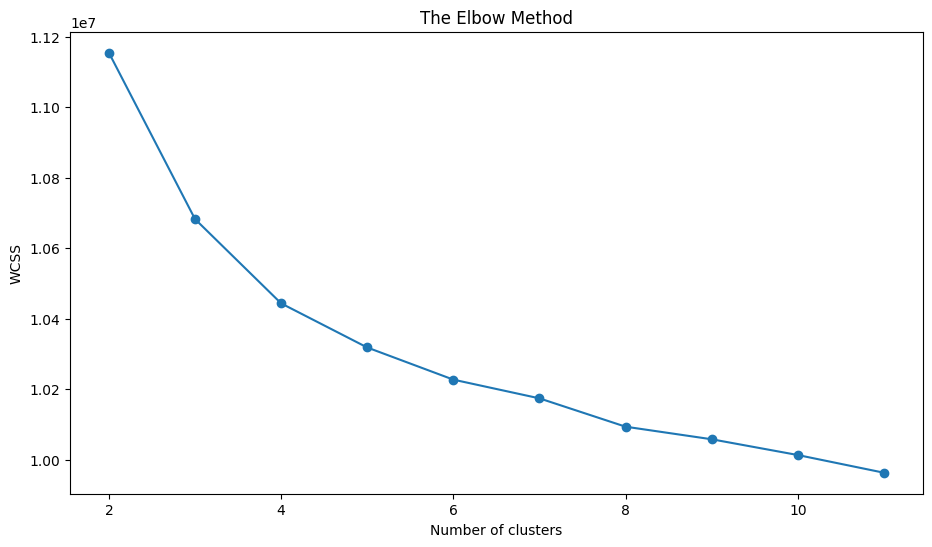

In [16]:
# TF-IDF VECTORIZATION
from sklearn.feature_extraction.text import CountVectorizer
tf_idf_vect = CountVectorizer()
tf_idf_vects = tf_idf_vect.fit_transform(df_mobile['Reviews'].values.astype('U'))
names= tf_idf_vect.get_feature_names_out()

## ELBOW METHOD
from sklearn.cluster import KMeans
wcs = []
for i in range(2,12):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 101)
    kmeans.fit(tf_idf_vects)
    wcs.append(kmeans.inertia_)

plt.figure(figsize = (11,6))
plt.plot(range(2,12), wcs, marker = "o")
plt.title ("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [17]:
#forming 6 clusters
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 6,init='k-means++',max_iter=10000, random_state=50)
model.fit(tf_idf_vects)
from collections import Counter
Counter(model.labels_)

# Clusters containing words with max strength
words = 7
centroids = model.cluster_centers_.argsort()[:, ::-1]
for cluster_num in range(6):
    key_features = [names[i] for i in centroids[cluster_num, :words]]
    print('Cluster '+str(cluster_num+1))
    print('Top Words:', key_features)

cluster_center=model.cluster_centers_
cluster_center

Cluster 1
Top Words: ['phone', 'screen', 'one', 'like', 'use', 'battery', 'good']
Cluster 2
Top Words: ['phone', 'great', 'one', 'screen', 'good', 'use', 'like']
Cluster 3
Top Words: ['phone', 'screen', 'one', 'like', 'use', 'battery', 'get']
Cluster 4
Top Words: ['phone', 'great', 'good', 'love', 'works', 'one', 'like']
Cluster 5
Top Words: ['good', 'great', 'product', 'works', 'excellent', 'love', 'like']
Cluster 6
Top Words: ['phone', 'screen', 'battery', 'one', 'use', 'android', 'like']


array([[7.97257434e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.63263226e-05, 2.31631613e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.06464147e-04, 1.76616037e-03, 3.53232073e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.37022607e-05, 6.74045215e-06, 0.00000000e+00, ...,
        0.00000000e+00, 3.37022607e-05, 0.00000000e+00],
       [4.84146619e-06, 0.00000000e+00, 0.00000000e+00, ...,
        4.84146619e-06, 4.84146619e-06, 4.84146619e-06],
       [0.00000000e+00, 0.00000000e+00, 2.58397933e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [1]:
#DBSCN
review=[]
for i in df_mobile['Reviews']:
    review.append(str(i).split())
import gensim
w2v_model= gensim.models.Word2Vec(review, vector_size = 100, workers=4)

import numpy as np
vector = []
for i in review:
    vectors = np.zeros(100)
    count = 0
    for word in i:
        try:
            vec = w2v_model.wv[word]
            vectors += vec
            count += 1
        except:
            pass
    vectors /= count
    vector.append(vectors)
vector = np.array(vector)
vector = np.nan_to_num(vector)

from sklearn.cluster import DBSCAN
minPts = 2 * 100
# Lower bound function
def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    # Binary searching
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data):
    dists = []
    for val in data:
      # computing distances
        dist = np.sum((x - val) **2 )
        if(len(dists) == 200 and dists[199] > dist):
            l = int(lower_bound(dists, dist))
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()

# Dist 199 contains the distance of 200th nearest neighbour.
    return dists[199]

vector.shape

# Computing the 200th nearest neighbour distance of some point the dataset:
twohundrethneigh = []
for val in vector[:1000]:
    twohundrethneigh.append( compute200thnearestneighbour(val, vector[:1000]) )
twohundrethneigh.sort()

# Plotting for the Elbow Method :
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

# Create the model
model_dbs = DBSCAN(eps = 5, min_samples = minPts)
model_dbs.fit(vector)
df_dbs = df_mobile
df_dbs["DBS Cluster Label"] = model_dbs.labels_
df_dbs



NameError: ignored

In [ ]:
#Hierarchical Clustering
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(vector,method='ward'))
plt.axhline(y=20)

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  #took n=3 from dendrogram curve
Agg=cluster.fit_predict(vector)
df_mobile['AVG-W2V Clus Label'] = cluster.labels_
df_mobile.head()

hier_clust_df = df_mobile
hier_clust_df["Hierarchial Cluster Labels"] = cluster.labels_
hier_clust_df.groupby(["Hierarchial Cluster Labels"])["Reviews"].count()


In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

In [ ]:
#You can write you answer here. (No code needed)


In the realm of unsupervised machine learning, K-means, DBSCAN, and hierarchical clustering are well-liked methods with unique features. By iteratively allocating data points to the cluster whose centroid is nearest, K-means divides a dataset into k clusters, which eventually converge to clusters with clearly defined centers. A cluster of any shape can be found using DBSCAN, which groups data points that are near to one another and have enough neighbors within a given radius to identify clusters based on density. Using agglomerative (bottom-up) or divisive (top-down) techniques, hierarchical clustering creates a tree-like structure of nested clusters to represent associations between data points at various granularities at different levels. DBSCAN automatically detects initializations, but K-means requires a predetermined number of clusters and is sensitive to them.